In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_excel("CDR_6_MRI_selected.xlsx")

In [5]:
data

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001671,0.003623,0.004062,0.004795,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947
1596,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001556,0.002941,0.002707,0.002837,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390
1597,1,2,1.0,1.0,1.0,1.0,1.0,1,2,7,...,0.001389,0.003687,0.002828,0.001960,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956
1598,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001748,0.003810,0.004254,0.003466,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

In [7]:
X = data.iloc[:,15:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

In [8]:
y = data["CDRGLOB"]

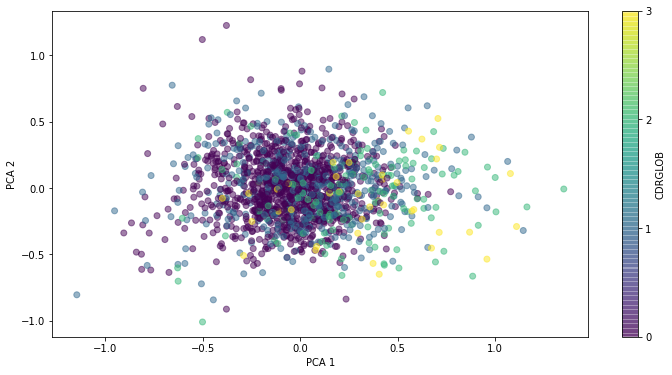

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5, c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label = "CDRGLOB", ticks=[0,1,2,3])
plt.show()

In [10]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out_lle = model.fit_transform(X)

In [11]:
out_lle.shape

(1600, 2)

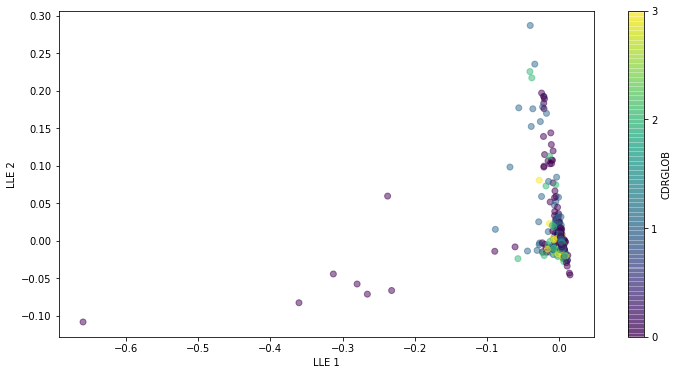

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(out_lle[:, 0], out_lle[:, 1], alpha=0.5, c=y)
plt.xlabel("LLE 1")
plt.ylabel("LLE 2")
plt.colorbar(label = "CDRGLOB", ticks=[0,1,2,3])
plt.show()

In [13]:
model = Isomap(n_components=2)
data_isomap = model.fit_transform(X)

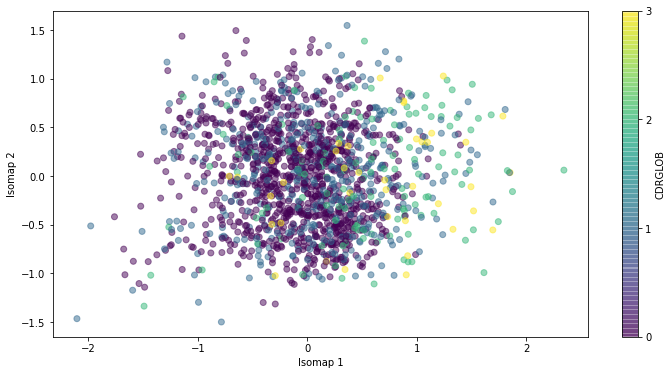

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(data_isomap[:, 0], data_isomap[:, 1], alpha=0.5, c=y)
plt.xlabel("Isomap 1")
plt.ylabel("Isomap 2")
plt.colorbar(label = "CDRGLOB", ticks=[0,1,2,3])
plt.show()

In [15]:
X.shape

(1600, 23)

TASK-12B: Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 

3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier

For this task, please use them with their default parameter values.

In [16]:
pca2 = PCA(7)  # project from 64 to 2 dimensions
projected2 = pca2.fit_transform(X)

In [17]:
from sklearn.manifold import LocallyLinearEmbedding
model_lle = LocallyLinearEmbedding(random_state=0, n_components=7)
out_lle2 = model_lle.fit_transform(X)

In [18]:
out_lle2.shape

(1600, 7)

In [19]:
model_iso = Isomap(n_components=7)
data_isomap2 = model_iso.fit_transform(X)

In [20]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=3, init='random', random_state=0)
data_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
target_names = ['CDRGLOB 0', 'CDRGLOB 1', 'CDRGLOB 2', 'CDRGLOB 3']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(projected2, y, test_size=0.25, random_state=0, stratify=y)

In [24]:
X_train_lle, X_test_lle, y_train_lle, y_test_lle = train_test_split(out_lle2, y, test_size=0.25, random_state=0,stratify=y)

In [25]:
X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(data_isomap2, y, test_size=0.25, random_state=0,stratify=y)

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [27]:
gnb.fit(X_train_pca,y_train_pca)
predict_gnb_pca = gnb.predict(X_test_pca)

In [28]:
gnb.fit(X_train_lle,y_train_lle)
predict_gnb_lle = gnb.predict(X_test_lle)

In [29]:
gnb.fit(X_train_iso,y_train_iso)
predict_gnb_iso = gnb.predict(X_test_iso)

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
gnb_report_pca = classification_report(y_test_pca,predict_gnb_pca,target_names=target_names)
gnb_report_lle = classification_report(y_test_lle,predict_gnb_lle,target_names=target_names)
gnb_report_iso = classification_report(y_test_iso,predict_gnb_iso,target_names=target_names)

In [32]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf",random_state=0)

In [33]:
svc.fit(X_train_pca,y_train_pca)
predict_svc_pca = svc.predict(X_test_pca)

In [34]:
svc.fit(X_train_lle,y_train_lle)
predict_svc_lle = svc.predict(X_test_lle)

In [35]:
svc.fit(X_train_iso,y_train_iso)
predict_svc_iso = svc.predict(X_test_iso)

In [ ]:
svc_report_pca = classification_report(y_test_pca,predict_svc_pca,target_names=target_names)
svc_report_lle = classification_report(y_test_lle,predict_svc_lle,target_names=target_names)
svc_report_iso = classification_report(y_test_iso,predict_svc_iso,target_names=target_names)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [38]:
rfc.fit(X_train_pca,y_train_pca)
predict_rfc_pca = rfc.predict(X_test_pca)

In [39]:
rfc.fit(X_train_lle,y_train_lle)
predict_rfc_lle = rfc.predict(X_test_lle)

In [40]:
rfc.fit(X_train_iso,y_train_iso)
predict_rfc_iso = rfc.predict(X_test_iso)

In [ ]:
rfc_report_pca = classification_report(y_test_pca,predict_rfc_pca,target_names=target_names)
rfc_report_lle = classification_report(y_test_lle,predict_rfc_lle,target_names=target_names)
rfc_report_iso = classification_report(y_test_iso,predict_rfc_iso,target_names=target_names)

In [42]:
print("gnb_report_pca \n",gnb_report_pca)
print("gnb_report_lle \n",gnb_report_lle)
print("gnb_report_iso \n",gnb_report_iso)

gnb_report_pca 
               precision    recall  f1-score   support

   CDRGLOB 0       0.72      0.92      0.81       252
   CDRGLOB 1       0.47      0.24      0.31       106
   CDRGLOB 2       0.35      0.28      0.31        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.67       400
   macro avg       0.39      0.36      0.36       400
weighted avg       0.61      0.67      0.62       400

gnb_report_lle 
               precision    recall  f1-score   support

   CDRGLOB 0       0.66      0.95      0.78       252
   CDRGLOB 1       0.38      0.09      0.15       106
   CDRGLOB 2       0.33      0.09      0.15        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.63       400
   macro avg       0.34      0.28      0.27       400
weighted avg       0.54      0.63      0.54       400

gnb_report_iso 
               precision    recall  f1-score   support

   CDRGLOB 0       0.72 

In [43]:
print("svc_report_pca \n",svc_report_pca)
print("svc_report_lle \n",svc_report_lle)
print("svc_report_iso \n",svc_report_iso)

svc_report_pca 
               precision    recall  f1-score   support

   CDRGLOB 0       0.71      0.98      0.82       252
   CDRGLOB 1       0.45      0.17      0.25       106
   CDRGLOB 2       0.27      0.09      0.14        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.67       400
   macro avg       0.36      0.31      0.30       400
weighted avg       0.59      0.67      0.59       400

svc_report_lle 
               precision    recall  f1-score   support

   CDRGLOB 0       0.67      0.98      0.79       252
   CDRGLOB 1       0.44      0.10      0.17       106
   CDRGLOB 2       0.33      0.06      0.11        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.65       400
   macro avg       0.36      0.29      0.27       400
weighted avg       0.56      0.65      0.55       400

svc_report_iso 
               precision    recall  f1-score   support

   CDRGLOB 0       0.71 

In [44]:
print("rfc_report_pca \n",rfc_report_pca)
print("rfc_report_lle \n",rfc_report_lle)
print("rfc_report_iso \n",rfc_report_iso)

rfc_report_pca 
               precision    recall  f1-score   support

   CDRGLOB 0       0.73      0.91      0.81       252
   CDRGLOB 1       0.44      0.28      0.34       106
   CDRGLOB 2       0.29      0.16      0.20        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.37      0.34      0.34       400
weighted avg       0.60      0.66      0.62       400

rfc_report_lle 
               precision    recall  f1-score   support

   CDRGLOB 0       0.69      0.86      0.77       252
   CDRGLOB 1       0.31      0.20      0.24       106
   CDRGLOB 2       0.31      0.16      0.21        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.61       400
   macro avg       0.33      0.30      0.30       400
weighted avg       0.54      0.61      0.56       400

rfc_report_iso 
               precision    recall  f1-score   support

   CDRGLOB 0       0.70 

In [45]:
# GNB için en yüksek acc değeri PCA'de
# SVC için en yüksek acc değeri PCA' ve ISO'de
# RFC için en yüksek acc değeri PCA'de

TASK-12C: Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations. 

In [46]:
pca_columns = list()
for i in range(1,8): 
  pca_columns.append(f"PCA_{i}")

In [47]:
projected2 = pd.DataFrame(data=projected2, columns =pca_columns)

In [48]:
lle_columns = list()
for i in range(1,8): 
  lle_columns.append(f"LLE_{i}")

In [49]:
out_lle2 = pd.DataFrame(data=out_lle2, columns =lle_columns)

In [50]:
iso_columns = list()
for i in range(1,8): 
  iso_columns.append(f"ISO_{i}")

In [51]:
data_isomap2 = pd.DataFrame(data=data_isomap2, columns =iso_columns)

In [52]:
tsne_columns = list()
for i in range(1,4):
  tsne_columns.append(f"TSNE_{i}")

In [53]:
data_tsne = pd.DataFrame(data=data_tsne, columns=tsne_columns)

In [54]:
combined_data = pd.concat([projected2.iloc[:,:5],out_lle2.iloc[:,:5]],axis=1)

In [55]:
combined_data = pd.concat([combined_data, data_isomap2.iloc[:,:5]],axis=1)

In [56]:
combined_data = pd.concat([combined_data, data_tsne],axis=1)

In [57]:
combined_data

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,LLE_1,LLE_2,LLE_3,LLE_4,LLE_5,ISO_1,ISO_2,ISO_3,ISO_4,ISO_5,TSNE_1,TSNE_2,TSNE_3
0,-0.173188,0.053453,0.235939,-0.106520,0.232752,0.002889,-0.020213,0.015277,0.023117,0.012233,-0.566281,0.309181,-0.647554,0.185905,0.043190,-5.227818,-21.518064,-0.971876
1,0.016375,-0.275966,-0.058347,-0.266962,0.221912,-0.034376,0.045945,-0.009942,-0.005201,-0.008583,0.226517,-0.701670,-0.125314,-0.422319,0.321403,-5.402409,16.403078,-20.480886
2,-0.152290,0.141853,0.136351,0.127297,0.270471,0.005052,-0.021748,0.012766,0.020925,0.012937,-0.379066,0.380802,-0.579575,-0.051884,-0.647072,9.870771,-15.312057,-5.873972
3,0.278346,0.122959,0.050041,0.040090,0.101338,0.022135,-0.021065,-0.045925,0.004658,0.007655,0.403583,0.214917,-0.267002,0.025304,-0.070084,-5.610105,7.458100,7.222076
4,0.002155,-0.461533,0.098341,-0.096184,-0.012017,-0.037581,0.050248,-0.007015,-0.007168,-0.010275,0.273901,-0.853463,-0.148119,-0.049977,0.150162,-10.513532,11.723265,-14.355968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.009816,0.881755,-0.248759,0.108955,0.265358,0.012314,-0.019934,-0.010525,-0.000253,0.002551,-0.557543,1.392335,0.263927,-0.844099,-0.051218,10.496023,0.305529,22.611347
1596,0.163059,0.381546,-0.292945,0.184885,-0.005445,0.013912,-0.014759,-0.014549,-0.004566,0.000500,0.263231,0.609137,0.622609,-0.367460,-0.364438,11.851789,3.666624,17.317024
1597,0.081906,-0.104455,-0.215792,0.246014,-0.330291,-0.010669,-0.004718,0.051003,-0.087233,-0.028837,0.177241,-0.300212,1.124314,0.566336,-0.174464,13.386319,11.582870,-5.614062
1598,-0.132770,0.278977,-0.300254,0.048824,-0.043503,-0.001419,-0.015590,0.028542,-0.018345,-0.005868,-0.495501,0.580393,0.907107,0.099665,0.173556,17.265350,-14.919256,6.796895


In [58]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_data, y, test_size=0.25, random_state=0, stratify=y)

In [61]:
gnb.fit(X_train_combined,y_train_combined)
predict_gnb_combined = gnb.predict(X_test_combined)

In [62]:
print(classification_report(y_test_combined,predict_gnb_combined,target_names=target_names))

              precision    recall  f1-score   support

   CDRGLOB 0       0.72      0.93      0.81       252
   CDRGLOB 1       0.47      0.17      0.25       106
   CDRGLOB 2       0.31      0.34      0.33        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.66       400
   macro avg       0.38      0.36      0.35       400
weighted avg       0.61      0.66      0.61       400



In [59]:
svc.fit(X_train_combined,y_train_combined)
predict_svc_combined = svc.predict(X_test_combined)

In [60]:
print(classification_report(y_test_combined,predict_svc_combined,target_names=target_names))

              precision    recall  f1-score   support

   CDRGLOB 0       0.67      0.98      0.80       252
   CDRGLOB 1       0.40      0.11      0.18       106
   CDRGLOB 2       0.60      0.09      0.16        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.65       400
   macro avg       0.42      0.30      0.28       400
weighted avg       0.58      0.65      0.56       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
rfc.fit(X_train_combined,y_train_combined)
predict_rfc_combined = rfc.predict(X_test_combined)

In [64]:
print(classification_report(y_test_combined,predict_rfc_combined,target_names=target_names))

              precision    recall  f1-score   support

   CDRGLOB 0       0.74      0.88      0.80       252
   CDRGLOB 1       0.41      0.30      0.35       106
   CDRGLOB 2       0.28      0.16      0.20        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.65       400
   macro avg       0.35      0.33      0.34       400
weighted avg       0.59      0.65      0.61       400



In [ ]:
# GNB daha iyi duruyor fakat daha kompleks olduğu için grid search ile RandomForest Deniyorum.

In [72]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[100, 200, 300, 400, 500],
              'criterion':["gini", "entropy"],
              "min_samples_split" : [2,3,4]
              }

clf = GridSearchCV(rfc, parameters)
clf.fit(X_train_combined,y_train_combined)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [73]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=400, random_state=0)

In [74]:
RFC = clf.best_estimator_
my_predictions_RFC = RFC.fit(X_train_combined,y_train_combined).predict(X_test_combined)

In [75]:
print(classification_report(y_test_combined, my_predictions_RFC, target_names=target_names))

              precision    recall  f1-score   support

   CDRGLOB 0       0.73      0.93      0.82       252
   CDRGLOB 1       0.44      0.25      0.32       106
   CDRGLOB 2       0.32      0.19      0.24        32
   CDRGLOB 3       0.00      0.00      0.00        10

    accuracy                           0.67       400
   macro avg       0.37      0.34      0.34       400
weighted avg       0.60      0.67      0.62       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TASK-12D: Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply the k-means algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE. 

In [108]:
data.iloc[:,15:].head()

,GRAYVOL,WMHVOL,HIPPOVOL,CERETISS,LATVENT,FRCORT,OCCCORT,PARCORT,TEMPCOR,LCUNM,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,0.538469,0.000522,0.006573,0.863848,0.012068,0.150552,0.058912,0.092326,0.108719,0.001518,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,0.548315,0.000457,0.006276,0.863232,0.010662,0.165166,0.049651,0.089356,0.105296,0.001289,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,0.552288,0.007150,0.006077,0.886453,0.010202,0.152706,0.061638,0.093899,0.119795,0.001303,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,0.585542,0.000000,0.005425,0.863620,0.007963,0.169945,0.064592,0.095552,0.121245,0.001231,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,0.540040,0.000074,0.006182,0.867648,0.006463,0.162207,0.051860,0.081467,0.109761,0.001065,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674


In [110]:
print(X)
# X üstteki datanın scale edilmiş halidir. Colab dosyasının başında dönüştürmüştüm

[[0.34466296 0.00276713 0.70394774 ... 0.38126392 0.35275158 0.40716566]
 [0.38518066 0.00241988 0.64284949 ... 0.57145031 0.35370065 0.26270722]
 [0.40152897 0.03786587 0.60198398 ... 0.44900941 0.46514979 0.51360024]
 ...
 [0.57348624 0.08992182 0.57822605 ... 0.62295476 0.48810442 0.32662128]
 [0.61830927 0.13984642 0.67399771 ... 0.55820967 0.36333314 0.25037979]
 [0.5993941  0.05787578 0.70584069 ... 0.65944561 0.52735209 0.29157177]]


In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=0)

In [111]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels_4 = clusterer.fit_predict(X)

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(cluster_labels_4,y)

array([[418, 112,  30,   8],
       [141,  58,  10,   5],
       [345, 132,  15,   1],
       [102, 122,  75,  26]])

In [ ]:
tsne_clusters = TSNE(n_components=2, init='random', random_state=0)
data_tsne_for_clusters = tsne_clusters.fit_transform(X)

In [114]:
data_tsne_for_clusters

array([[ 26.413784 ,  -2.9760723],
       [ -2.6563215, -19.661549 ],
       [ 26.600325 ,  -6.3046584],
       ...,
       [  3.9351177, -32.919853 ],
       [ 41.975597 ,  -7.083722 ],
       [ 18.254036 , -27.994745 ]], dtype=float32)

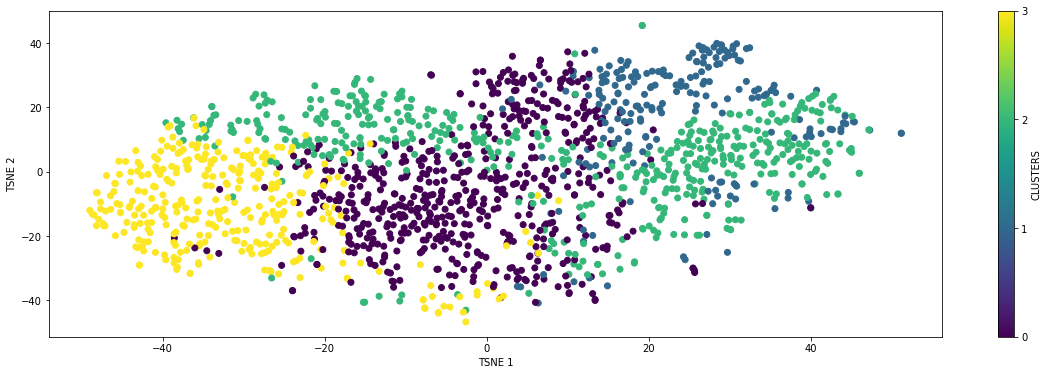

In [120]:
plt.figure(figsize=(20,6))
plt.scatter(x = data_tsne_for_clusters[:,0] , y = data_tsne_for_clusters[:,1], c=cluster_labels_4)
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.colorbar(label = "CLUSTERS", ticks=[0,1,2,3])
plt.show()

TASK-12E: Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means. 

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
list_SS = []
for no_clusters in range(2,51):

    clusterer = KMeans(n_clusters=no_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    list_SS.append(silhouette_avg)

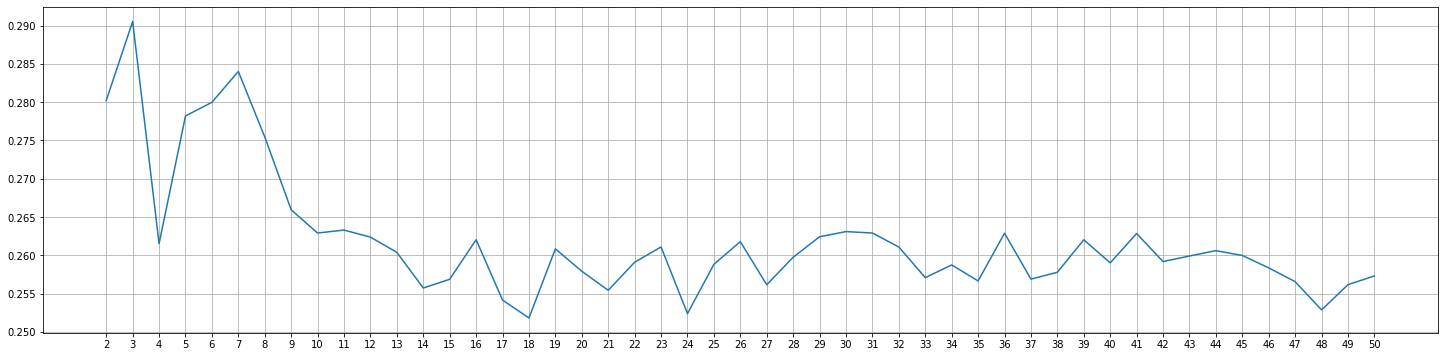

In [81]:
plt.figure(figsize=(25,6))
plt.plot(range(2,51),list_SS)
plt.xticks(range(2,51))
plt.grid(True)
plt.show()

In [82]:
clusterer = KMeans(n_clusters=7, random_state=10)
cluster_labels_7 = clusterer.fit_predict(combined_data)

In [85]:
cluster_labels_7

array([4, 2, 4, ..., 0, 4, 0], dtype=int32)

TASK-12F: Please use the final dataset but this time add the following columns and then run the model with grid search optimization:

SEX

INDEPEND

NPISCORE

FAQ


In [86]:
combined_data[["SEX", "INDEPEND", "NPISCORE", "FAQ"]] = data[["SEX", "INDEPEND", "NPISCORE", "FAQ"]]

In [87]:
combined_data.head(3)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,LLE_1,LLE_2,LLE_3,LLE_4,LLE_5,...,ISO_3,ISO_4,ISO_5,TSNE_1,TSNE_2,TSNE_3,SEX,INDEPEND,NPISCORE,FAQ
0,-0.173188,0.053453,0.235939,-0.106520,0.232752,0.002889,-0.020213,0.015277,0.023117,0.012233,...,-0.647554,0.185905,0.043190,-5.227818,-21.518064,-0.971876,2,1,0,0
1,0.016375,-0.275966,-0.058347,-0.266962,0.221912,-0.034376,0.045945,-0.009942,-0.005201,-0.008583,...,-0.125314,-0.422319,0.321403,-5.402409,16.403078,-20.480886,2,1,0,0
2,-0.152290,0.141853,0.136351,0.127297,0.270471,0.005052,-0.021748,0.012766,0.020925,0.012937,...,-0.579575,-0.051884,-0.647072,9.870771,-15.312057,-5.873972,2,1,0,0


In [90]:
X_train_combined2, X_test_combined2, y_train_combined2, y_test_combined2 = train_test_split(combined_data, y, test_size=0.25, random_state=0, stratify=y)

In [91]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[100, 200, 300, 400, 500],
              'criterion':["gini", "entropy"],
              "min_samples_split" : [2,3,4,5]
              }

clf2 = GridSearchCV(rfc, parameters)
clf2.fit(X_train_combined2,y_train_combined2)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [92]:
clf2.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=500, random_state=0)

In [95]:
RFC2 = clf2.best_estimator_
my_predictions_RFC2 = RFC2.fit(X_train_combined2,y_train_combined2).predict(X_test_combined2)

In [99]:
print(classification_report(y_test_combined2, my_predictions_RFC2, target_names=target_names))

              precision    recall  f1-score   support

   CDRGLOB 0       0.88      0.94      0.91       252
   CDRGLOB 1       0.71      0.65      0.68       106
   CDRGLOB 2       0.61      0.59      0.60        32
   CDRGLOB 3       0.75      0.30      0.43        10

    accuracy                           0.82       400
   macro avg       0.74      0.62      0.66       400
weighted avg       0.81      0.82      0.81       400



TASK-12G: Then for comparison purposes, use only these four columns to develop a model):

SEX

INDEPEND

NPISCORE

FAQ


In [97]:
X_train_combined3, X_test_combined3, y_train_combined3, y_test_combined3 = train_test_split(combined_data.iloc[:,-4:], y, test_size=0.25, random_state=0, stratify=y)

In [98]:
clf3 = GridSearchCV(rfc, parameters)
clf3.fit(X_train_combined3,y_train_combined3)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [100]:
clf3.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=400, random_state=0)

In [101]:
RFC3 = clf3.best_estimator_
my_predictions_RFC3 = RFC3.fit(X_train_combined3,y_train_combined3).predict(X_test_combined3)

In [102]:
print(classification_report(y_test_combined3, my_predictions_RFC3, target_names=target_names))

              precision    recall  f1-score   support

   CDRGLOB 0       0.88      0.94      0.91       252
   CDRGLOB 1       0.74      0.62      0.68       106
   CDRGLOB 2       0.75      0.66      0.70        32
   CDRGLOB 3       0.67      0.80      0.73        10

    accuracy                           0.83       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.83      0.83      0.83       400

